In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv("F:/top mentor/new assignment/train.csv")
test_data = pd.read_csv("F:/top mentor/new assignment/test.csv")

In [3]:
train_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
test_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [7]:
duplicate_rows = train_data[train_data.duplicated()]
print("Number of duplicate rows:",duplicate_rows.shape)

Number of duplicate rows: (0, 12)


In [8]:
duplicate_rows = test_data[test_data.duplicated()]
print("Number of duplicate rows:",duplicate_rows.shape)

Number of duplicate rows: (0, 11)


In [9]:
train_data.shape

(381109, 12)

In [10]:
test_data.shape

(127037, 11)

In [11]:
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
test_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

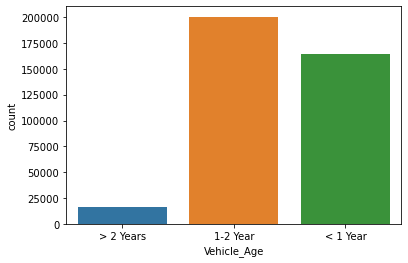

In [13]:
sns.countplot(train_data['Vehicle_Age'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

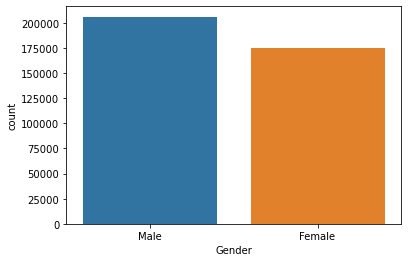

In [14]:
sns.countplot(train_data['Gender'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

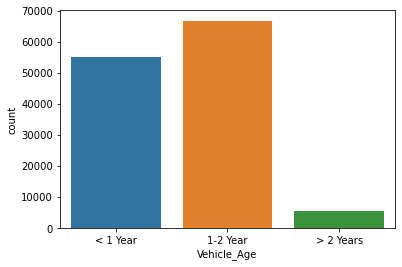

In [15]:
sns.countplot(test_data['Vehicle_Age'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

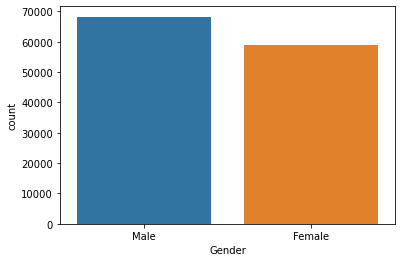

In [16]:
sns.countplot(test_data['Gender'])

In [27]:
del train_data['id']

In [28]:
train_data.duplicated(keep='first').value_counts()

train_data1 = train_data[~train_data.duplicated()]
train_data1.head(2)
train_data1.shape

(380840, 11)

In [29]:
pearson_Corr = train_data.corr()

<AxesSubplot:>

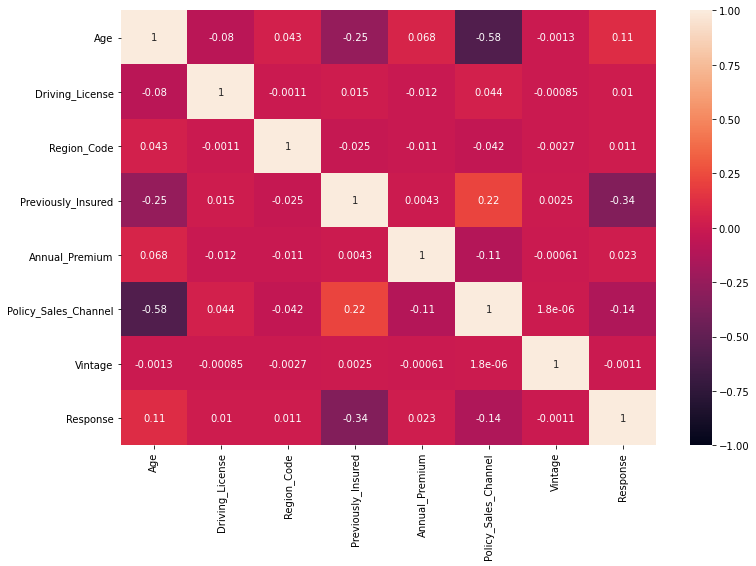

In [30]:
fig = plt.subplots(figsize=(12,8))
sns.heatmap(pearson_Corr,vmax = 1,vmin = -1,annot = True)

In [31]:
pearson_Corr['Policy_Sales_Channel']

Age                    -0.577826
Driving_License         0.043731
Region_Code            -0.042420
Previously_Insured      0.219381
Annual_Premium         -0.113247
Policy_Sales_Channel    1.000000
Vintage                 0.000002
Response               -0.139042
Name: Policy_Sales_Channel, dtype: float64

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

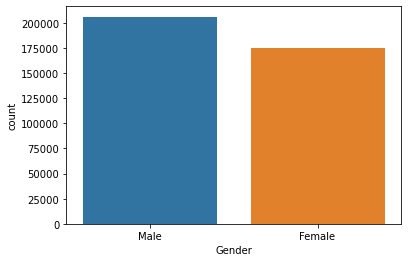

In [32]:
sns.countplot(train_data['Gender'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Driving_License', ylabel='count'>

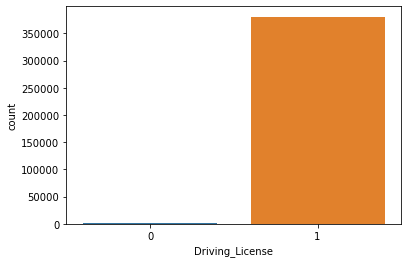

In [33]:
sns.countplot(train_data['Driving_License'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

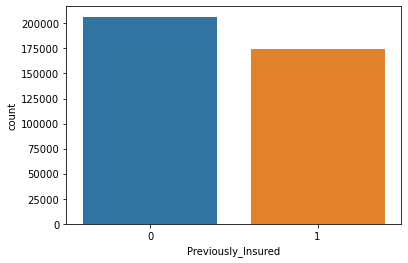

In [34]:
sns.countplot(train_data['Previously_Insured'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

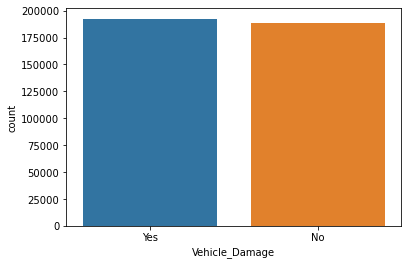

In [35]:
sns.countplot(train_data['Vehicle_Damage'])

C:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

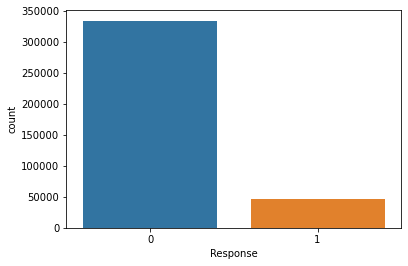

In [36]:
sns.countplot(train_data['Response'])

In [37]:
q1 = train_data['Annual_Premium'].quantile(0.25)
q3 = train_data['Annual_Premium'].quantile(0.75)

iqr = q3-q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

outlier_ap = train_data[(train_data['Annual_Premium']<lower_limit) | (train_data['Annual_Premium']>upper_limit)].shape
print('The shape of outliers in Annual Premium:', outlier_ap)

 
percent = round(outlier_ap[0]/len(train_data) * 100,2)
print(f'Percentage of outliers : {percent}%')

The shape of outliers in Annual Premium: (10320, 11)
Percentage of outliers : 2.71%


In [38]:
train_data1.shape

(380840, 11)

In [39]:
dummy = pd.get_dummies(train_data1['Gender'])

In [40]:
dummy.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [41]:
df = pd.concat((train_data1,dummy),axis=1)

In [42]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Female,Male
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0,1
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,1
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1,0


In [43]:
df1 = df.drop(['Gender'], axis = 1)

In [44]:
df2 = df1.drop(['Male'], axis = 1)

In [45]:
df3 = df1.rename(columns= {'Female':'Gender'})

In [46]:
df4 = df3.drop(['Male'],axis = 1)

In [47]:
df4

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender
0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0
1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0
2,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0
3,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0
4,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1
...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,0
381105,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,0
381106,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,0
381107,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,1


In [59]:
X = df4
y = df4

In [60]:
y

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender
0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0
1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0
2,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0
3,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0
4,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1
...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,0
381105,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,0
381106,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,0
381107,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,1


In [61]:
X

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender
0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0
1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0
2,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0
3,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0
4,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1
...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,0
381105,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,0
381106,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,0
381107,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,1


In [62]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [63]:
Dsc_tree = DecisionTreeClassifier(criterion = 'entropy')

In [64]:
%%time
model_train = Dsc_tree.fit(X_train,y_train)
print("Training Complete")

ValueError: could not convert string to float: '1-2 Year'

In [65]:
from scipy.stats import skew
print(skew(train_data['Age']))
print(skew(train_data['Annual_Premium']))
print(skew(train_data['Vintage']))
print(skew(train_data['Policy_Sales_Channel']))
print(skew(train_data['Region_Code']))

0.6725363506891485
1.7660802637778974
0.003029504966164472
-0.900004581180819
-0.11526596121061375


In [67]:
df4.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender
count,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000
mean,38.823593,0.997868,26.388307,0.458208,30584.016078,112.030225,154.344607,0.122584,0.459253
std,15.513206,0.046126,13.229907,0.498251,17203.258664,54.206194,83.670240,0.327960,0.498338
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24426.000000,29.000000,82.000000,0.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31678.500000,133.000000,154.000000,0.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000,0.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,1.000000
